(참고: https://mc.ai/pytorch%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-intro/)

### 항상 import 해야 할 패키지
1. nn: Deep learning model에 필요한 모듈이 모아져 있는 패키지 (nn.Linear(128,128), nn.ReLU())

2. F: nn과 같은 모듈이 모아져 있지만 함수의 input으로 연산이 되어야 하는 값을 받는다. (F.linear(X, 128, 128), R.relu(X))

3. optim: 학습에 관련된 optimizing method가 있는 패키지

4. data_utils: batch generator 등 학습 데이터에 관련된 패키지

### 모델 뼈대코드
class 형태의 모델은 항상 nn.Module을 상속받아야 하며, super(모델명, self).__init__() 을 통해 nn.Module.__init__()을 실행시키는 코드가 필요하다.

### 학습 뼈대코드
모델을 학습시키기 전에 정해야 할 것들.
1. 어떤 loss를 쓸 것인지
2. learning rate는 몇으로 할 것인지
3. optimizer는 무엇으로 할 것인지
4. 학습 횟수는 몇 번으로 할 것인지

**공식처럼 외우기** (매 epoch, 매 iteration마다 back propagation을 통해 모델의 파라미터를 업데이트 시켜주는 과정에 사용)

optimizer.zero_grad()
pred = model(x)
loss = criterion(pred, x_labels)
loss.backward()
optimizer.step()


In [9]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.autograd import Variable

In [118]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim, bias = True):
        #nn.Module.__init__() 실행
        super(LinearRegression, self).__init__()
        #nn.linear is defined in nn.Module
        #Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
        self.linear = nn.Linear(input_dim, output_dim, bias )
        
    def forward(self, x):
        #forward pass => linear function
        out = self.linear(x)
        return out


In [153]:
x_train = [[1],[2],[3]]
y_train = [[1],[2],[3]]

In [154]:
#hypothesis
model = LinearRegression(1,1, bias = True)

#cost 정의_ Mean Squared Loss
#Creates a criterion that measures the mean squared error between n elements in the input x and target y.
criterion = nn.MSELoss()

#model의 parameters를 SGD를 통해 learning rate만큼 학습시키겠다.
learning_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)

#data를 200번 돌려서 학습시키겠다.
epochs = 1000

### Training the Model

In [155]:
for epoch in range(1, epochs+1):
    #Variable: Wraps a tensor and records the operations applied to it
    x_train = Variable(torch.Tensor(x_train))
    y_train = Variable(torch.Tensor(y_train))
    
    #Clears the gradients of all optimized  tensors (set gradients as 0)
    optimiser.zero_grad()
    
    #forward to get predicted values
    outputs = model.forward(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()  #apply backpropagation
    optimiser.step()  #update the parameters
    if epoch % 20 == 0:
        for i in model.parameters():
            print(i.data.numpy())
        print('epoch  {}, loss  {}'.format(epoch, loss.item()))
        print( )

[[0.70341194]]
[0.6954135]
epoch  20, loss  0.06953407824039459

[[0.71064824]]
[0.65978324]
epoch  40, loss  0.06269221752882004

[[0.72360843]]
[0.6284953]
epoch  60, loss  0.056933943182229996

[[0.73653704]]
[0.5989316]
epoch  80, loss  0.05170829966664314

[[0.74891305]]
[0.57078147]
epoch  100, loss  0.046962298452854156

[[0.7607126]]
[0.54395664]
epoch  120, loss  0.042651936411857605

[[0.7719582]]
[0.51839256]
epoch  140, loss  0.03873710334300995

[[0.78267527]]
[0.49403015]
epoch  160, loss  0.035181719809770584

[[0.79288876]]
[0.47081256]
epoch  180, loss  0.03195257857441902

[[0.80262226]]
[0.4486861]
epoch  200, loss  0.02901984564960003

[[0.81189823]]
[0.42759955]
epoch  220, loss  0.02635631151497364

[[0.8207384]]
[0.4075039]
epoch  240, loss  0.023937197402119637

[[0.82916296]]
[0.3883527]
epoch  260, loss  0.02174016274511814

[[0.83719176]]
[0.37010157]
epoch  280, loss  0.019744757562875748

[[0.8448431]]
[0.35270813]
epoch  300, loss  0.01793249323964119

[[0

In [159]:
predicted = model.forward(Variable(torch.tensor([[1],[2],[3]], dtype = torch.float32))).data.numpy()

### Print the Predicted Values

OrderedDict([('linear.weight', tensor([[0.9712]])), ('linear.bias', tensor([0.0654]))])


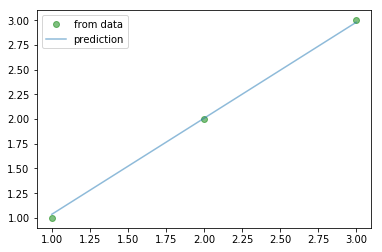

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train.numpy(), y_train.numpy(), 'go', label = 'from data', alpha = .5)
plt.plot(x_train.numpy(), predicted, label = 'prediction', alpha = 0.5)
plt.legend()
print(model.state_dict())

In [145]:
#예측값을 tensor에서 numpy로 바꾸기
predicted = model.forward(Variable(torch.tensor([[4],[5]], dtype = torch.float32))).data.numpy()
print('test data: 4, 5  |  predicted: ', predicted)

predicted = model.forward(Variable(torch.tensor([[2.5]], dtype = torch.float32))).data.numpy()
print('test data: 2.5  |  predicted: ', predicted)

test data: 4, 5  |  predicted:  [[3.995928]
 [4.99357 ]]
test data: 2.5  |  predicted:  [[2.4994652]]
